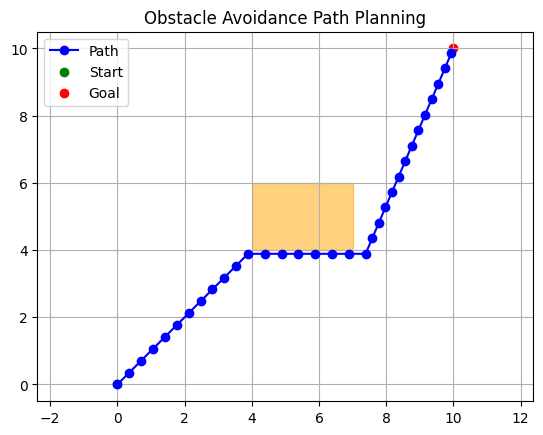

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Start and goal positions
# ప్రారంభ స్థానం మరియు లక్ష్య స్థానం
start = np.array([0.0, 0.0])
goal = np.array([10.0, 10.0])
trajectory = [start.copy()]

# Obstacle (a rectangle)
# ఆటంకం (ఒక దీర్ఘచతురస్రం)
obstacle_origin = np.array([4.0, 4.0])
obstacle_width = 3.0
obstacle_height = 2.0
x_range = (obstacle_origin[0], obstacle_origin[0] + obstacle_width)
y_range = (obstacle_origin[1], obstacle_origin[1] + obstacle_height)

# Settings
# అమరికలు
pos = start.copy()
step_size = 0.5  # ప్రతి అడుగు పరిమాణం
max_steps = 200  # గరిష్ట అడుగుల సంఖ్య

# Navigation loop
# నావిగేషన్ లూప్
for _ in range(max_steps):
    to_goal = goal - pos  # లక్ష్యం వరకు దూరం
    distance = np.linalg.norm(to_goal)  # దూరం లెక్కించు

    if distance < step_size:
        break  # లక్ష్యం చేరుకున్న తర్వాత ఆపు

    # Check proximity to obstacle
    # ఆటంకానికి సమీపంలో ఉందా అని చెక్ చేయు
    near_obstacle = (x_range[0] - 0.3 < pos[0] < x_range[1] + 0.3) and \
                    (y_range[0] - 0.3 < pos[1] < y_range[1] + 0.3)

    if near_obstacle:
        # Circumnavigate to the right
        # కుడివైపు ఆటంకాన్ని చుట్టివెళ్ళు
        if pos[0] <= x_range[1] + 0.3:
            pos += np.array([step_size, 0])  # కుడివైపు కదలించు
        else:
            pos += np.array([0, step_size])  # పైకి కదలించు
    else:
        direction = to_goal / distance  # లక్ష్య దిశ
        pos += direction * step_size  # ఆ దిశలో కదలించు

    trajectory.append(pos.copy())  # ప్రస్తుత స్థానం జతచేయి

trajectory = np.array(trajectory)

# Plotting
# గీయడం
fig, ax = plt.subplots()
ax.add_patch(plt.Rectangle(obstacle_origin, obstacle_width, obstacle_height, color='orange', alpha=0.5))  # ఆటంకాన్ని గీయు

plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', label='Path', color='blue')  # మార్గాన్ని గీయు
plt.scatter(*start, color='green', label='Start')  # ప్రారంభ బిందువు
plt.scatter(*goal, color='red', label='Goal')  # లక్ష్య బిందువు

plt.title("Obstacle Avoidance Path Planning")  # శీర్షిక
plt.grid(True)
plt.axis("equal")
plt.legend()
plt.show()
